# Descargar base de datos

In [ ]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2021-06-07 20:01:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2021-06-07 20:01:53 (803 MB/s) - ‘drug200.csv’ saved [6027/6027]



# Leemos el dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
len(df)

200

# Separamos la matriz de los targets

In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [ ]:
print(X.shape)

(200, 5)


In [ ]:
y = df["Drug"]

In [ ]:
print(y.shape)

(200,)


# Convertir variables categóricas en numéricas

In [ ]:
from sklearn import preprocessing

In [ ]:
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

# Dividir en un 80% training - 10% testing - 10% validate.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)
X_validate, X_testset, y_validate, y_testset = train_test_split(X_testset, y_testset, test_size=0.5, random_state=3)

In [ ]:
X_trainset[:5]

array([[31, 1, 0, 1, 11.227],
       [51, 1, 0, 0, 18.295],
       [49, 1, 1, 0, 10.537],
       [16, 0, 0, 1, 15.515999999999998],
       [24, 1, 0, 1, 9.475]], dtype=object)

In [ ]:
X_trainset[:5]

array([[31, 1, 0, 1, 11.227],
       [51, 1, 0, 0, 18.295],
       [49, 1, 1, 0, 10.537],
       [16, 0, 0, 1, 15.515999999999998],
       [24, 1, 0, 1, 9.475]], dtype=object)

In [ ]:
len(X_trainset)

160

In [ ]:
len(X_testset)

20

In [ ]:
len(X_validate)

20

# Crear clasificador

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#clf_rf = RandomForestClassifier(max_depth=5, n_estimators=10, criterion="entropy")

In [ ]:
clf.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_validate)

In [ ]:
y_pred

array(['drugX', 'drugX', 'drugY', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX'], dtype=object)

# Calcular precisión de la predicción

In [ ]:
accuraccy = np.sum(y_pred == y_validate) / y_validate.size
print("DecisionTrees's Accuracy: ", accuraccy)

DecisionTrees's Accuracy:  0.85


In [ ]:
from sklearn import metrics
accuraccy = metrics.accuracy_score(y_validate, y_pred)
print("DecisionTrees's Accuracy: ", accuraccy)

DecisionTrees's Accuracy:  0.85


In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

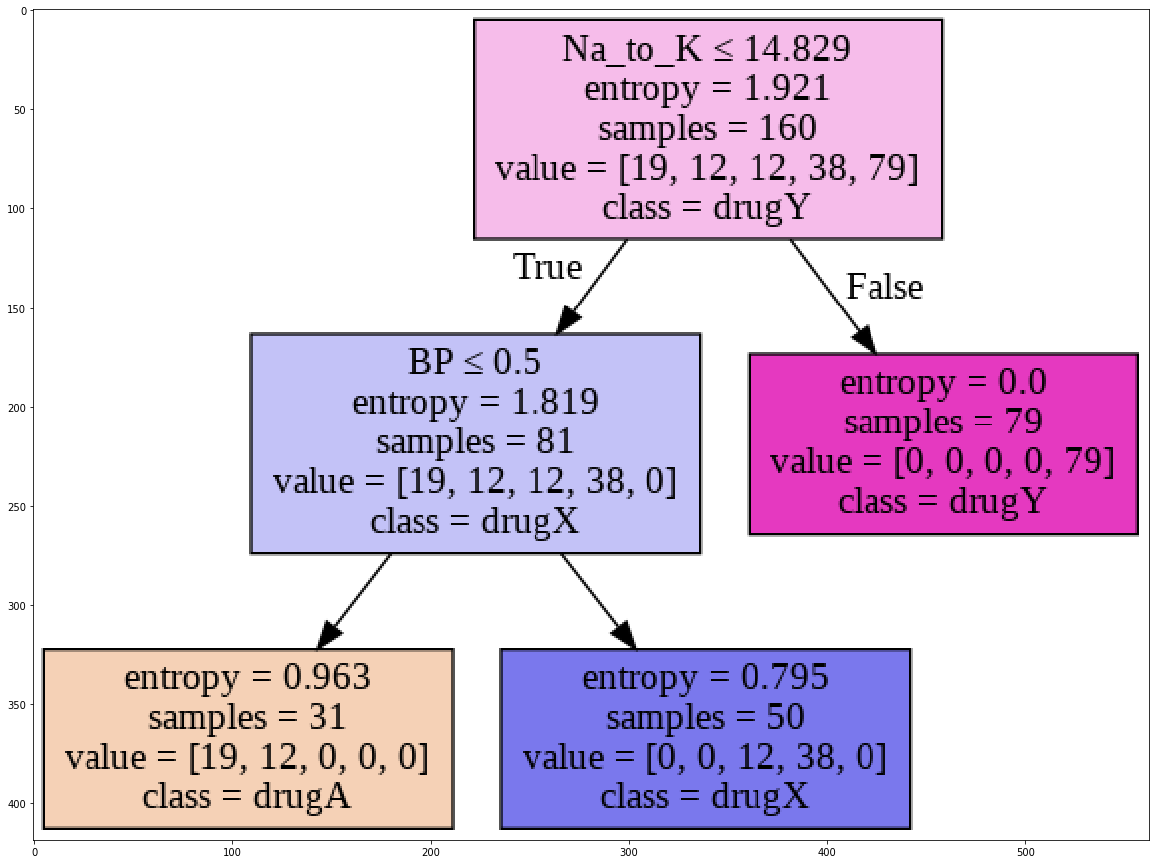

In [ ]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:5]
targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(clf,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 50))

plt.imshow(img,interpolation='nearest')


# Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

CM = confusion_matrix(y_validate, y_pred, normalize="pred")
print(CM)
# La visualizamos como heatmap
y = list(set(y))
print(y)
y.sort()
df_cm = pd.DataFrame(CM, y, y)

[[0.5 0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.8 0. ]
 [0.  0.  0.  0.  1. ]]
['drugA', 'drugX', 'drugY', 'drugB', 'drugC']


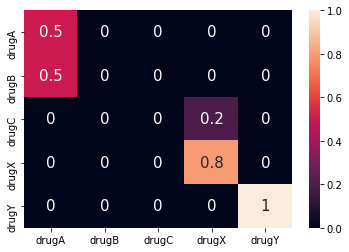

In [ ]:
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15})